In [ ]:
data_path = "/content/drive/MyDrive/Training AI/creditcard.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df_no_time = df.drop(columns=['Time'])
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import StandardScaler

df_no_time['Amount'] = StandardScaler().fit_transform(df_no_time['Amount'].values.reshape(-1,1))

In [ ]:
df_no_time['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [ ]:
df_no_time.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
# phân chia train - test
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df_no_time, test_size = 0.2, random_state = 42)

# Điều chế dữ liệu train
X_train = X_train[X_train['Class'] == 0]
X_train = X_train.drop(columns=['Class'])





In [ ]:
# Điều chế dữ liệu test
y_test = X_test['Class']
X_test = X_test.drop(columns=['Class'])

In [ ]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.102834
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.726255
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.229289
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.347232
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.349671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,-0.100318,0.195956,-0.589823,-2.860998,1.968679,0.868521,0.190198,0.371947,0.720130,0.426598,-0.316016,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,-0.050614
252263,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,-0.708527,-1.360826,-0.276850,-0.374285,0.260994,-0.279289,-0.071198,-0.440476,-0.603221,0.137972,-0.127503,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,-0.313289
221246,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,0.402303,-0.736174,-0.277358,-1.410242,0.993420,-1.039569,-0.636292,-0.488291,0.688922,1.322736,-0.008625,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,-0.322724
81910,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,0.579396,1.290638,0.625821,0.451252,-0.266850,0.194605,0.281370,-1.009127,0.119624,0.403906,0.424562,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,-0.338876


In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)

(227451, 29)
(56962, 29)


In [ ]:
X_train

array([[ 1.95504092e+00, -3.80782711e-01, -3.15012853e-01, ...,
         4.51682478e-02, -4.71447917e-02, -3.13288512e-01],
       [-4.00975239e-01, -6.26942769e-01,  1.55533881e+00, ...,
        -3.70468822e-01, -1.44791686e-01, -1.69717237e-01],
       [ 7.25090164e-02,  8.20565650e-01, -5.61350916e-01, ...,
         2.06394866e-01,  7.02877702e-02, -3.05292340e-01],
       ...,
       [-1.46608925e-01,  9.92946123e-01,  1.52459137e+00, ...,
        -1.21139194e-01, -1.96195328e-01, -3.37476933e-01],
       [-2.94863809e+00,  2.35484929e+00, -2.52120111e+00, ...,
         4.96912107e-01,  3.35821632e-01, -3.49231307e-01],
       [ 1.23317435e+00, -7.84850501e-01,  3.86783869e-01, ...,
         1.21657270e-03,  3.85878912e-02,  9.85543469e-02]])

In [ ]:
from keras.layers import Input, Dense
from keras.models import load_model, Model
from keras.callbacks import ModelCheckpoint

# Xây dựng Model
input_dimension = X_train.shape[1]
hidden_size = 128

# Input
input_layer = Input(shape = (input_dimension,))

# Encoder
encoder = Dense(hidden_size, activation = 'relu') (input_layer)
encoder = Dense(hidden_size //2, activation = 'relu') (encoder)
encoder = Dense(hidden_size // 4, activation = 'relu') (encoder)

# Decoder
decoder = Dense(hidden_size // 4, activation = 'relu') (encoder)
decoder = Dense(hidden_size // 2, activation = 'relu') (decoder)
decoder = Dense(hidden_size , activation = 'relu') (decoder)

# Output
output_layer = Dense(input_dimension, activation = 'relu') (decoder)

auto_encoder_model = Model(inputs = input_layer, outputs = output_layer)
auto_encoder_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])
auto_encoder_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320  

In [ ]:
# Train model
n_epochs = 50
n_batch_size = 32

save_best = ModelCheckpoint(filepath='/content/drive/MyDrive/Training AI/Model Checkpoint/best.h5', 
                            monitor='val_loss', verbose=1,save_best_only = True)

history = auto_encoder_model.fit(X_train, X_train, batch_size=n_batch_size, epochs=n_epochs, 
                                 verbose = 1, shuffle = True, callbacks= [save_best], 
                                 validation_data=(X_test, X_test))

Epoch 1/50
7108/7108 [==============================] - 34s 3ms/step - loss: 0.7023 - accuracy: 0.6908 - val_loss: 0.6701 - val_accuracy: 0.8272

Epoch 00001: val_loss improved from inf to 0.67008, saving model to /content/drive/MyDrive/Training AI/Model Checkpoint/best.h5
Epoch 2/50
7108/7108 [==============================] - 19s 3ms/step - loss: 0.6260 - accuracy: 0.8427 - val_loss: 0.6881 - val_accuracy: 0.8392

Epoch 00002: val_loss did not improve from 0.67008
Epoch 3/50
7108/7108 [==============================] - 19s 3ms/step - loss: 0.6461 - accuracy: 0.8354 - val_loss: 0.6879 - val_accuracy: 0.8344

Epoch 00003: val_loss did not improve from 0.67008
Epoch 4/50
7108/7108 [==============================] - 19s 3ms/step - loss: 0.6575 - accuracy: 0.8412 - val_loss: 0.6853 - val_accuracy: 0.8658

Epoch 00004: val_loss did not improve from 0.67008
Epoch 5/50
7108/7108 [==============================] - 20s 3ms/step - loss: 0.6542 - accuracy: 0.8467 - val_loss: 0.6823 - val_accurac

No handles with labels found to put in legend.


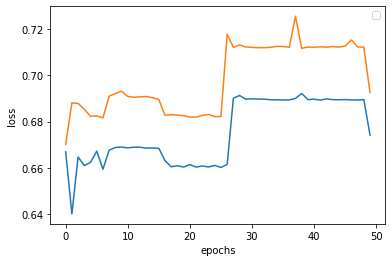

In [ ]:
# In hisstory

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()

plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# Kiểm tra việc tái tạp trong tập test 
import numpy as np

predicts = auto_encoder_model.predict(X_test)

mse = np.mean(np.power(X_test - predicts, 2), axis = 1)

err_df = pd.DataFrame({'error': mse, 'truth': y_test})

In [ ]:
err_df

,error,truth
43428,73.620727,1
49906,0.807128,0
29474,0.170557,0
276481,0.308924,0
278846,0.138787,0
...,...,...
75723,0.505884,0
252263,0.199660,0
221246,0.409985,0
81910,0.182971,0


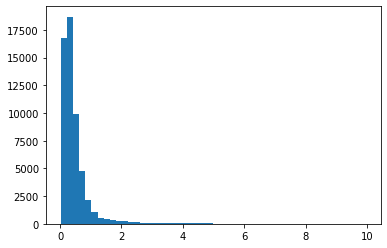

In [ ]:
# In ra histogram của error khi tái tạo các điểm Normal trong tập test

# normal_error_df = err_df[err_df['truth'] == 0 & err_df['error'] < 10]
normal_error_df = err_df[(err_df['truth']==0) & (err_df['error'] < 10)]

_ = plt.hist(normal_error_df.error.values, bins= 50)

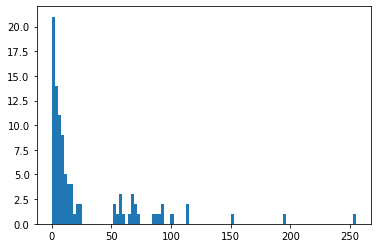

In [ ]:
# In ra histogram của error khi tái tạo các điểm Normal trong tập test

# normal_error_df = err_df[err_df['truth'] == 0 & err_df['error'] < 10]
fraud_error_df = err_df[err_df['truth']==1]

_ = plt.hist(fraud_error_df.error.values, bins= 100)

<function matplotlib.pyplot.show>

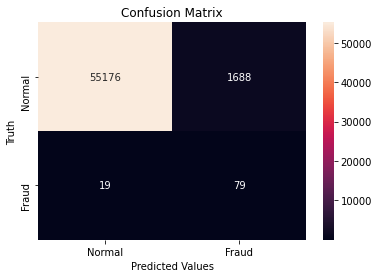

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

threshold = 2.3

y_pred = [1 if e > threshold else 0 for e in err_df.error.values]
conf_matrix = confusion_matrix(err_df.truth, y_pred)

sns.heatmap(conf_matrix, xticklabels = ['Normal', 'Fraud'], yticklabels = ['Normal', 'Fraud'], annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Truth')
plt.show